<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [4]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 64 kB 2.9 MB/s             


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [5]:
dict_={'a':[11,21,31],'b':[12,22,32]}
dict_

{'a': [11, 21, 31], 'b': [12, 22, 32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [6]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [7]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [19]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [6]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [9]:
type(bitcoin_data )
bitcoin_data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [23]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1636441378800, 68078.55816165461],
 [1636444891581, 67963.24297026609],
 [1636448522252, 68243.69457859156],
 [1636452320831, 68298.3557379976],
 [1636456345763, 68029.95057993913]]

Finally lets turn this data into a Pandas DataFrame.


In [32]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1636441378800,68078.558162
1,1636444891581,67963.242970
2,1636448522252,68243.694579
3,1636452320831,68298.355738
4,1636456345763,68029.950580
...,...,...
717,1639018817654,50007.202748
718,1639022593546,49628.908943
719,1639026249059,49773.511409
720,1639029635163,49859.220811


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [36]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1636441378800,68078.558162,2021-11-09
1,1636444891581,67963.242970,2021-11-09
2,1636448522252,68243.694579,2021-11-09
3,1636452320831,68298.355738,2021-11-09
4,1636456345763,68029.950580,2021-11-09
...,...,...,...
717,1639018817654,50007.202748,2021-12-09
718,1639022593546,49628.908943,2021-12-09
719,1639026249059,49773.511409,2021-12-09
720,1639029635163,49859.220811,2021-12-09


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [43]:
#candlestick_data = data.groupby(data.date).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-11-09  66747.361005  68298.355738  68078.558162  67549.367640
1   2021-11-10  65261.569194  68640.160350  67145.374935  65261.569194
2   2021-11-11  64712.056838  65735.078555  65061.054407  65419.411416
3   2021-11-12  63091.010593  65746.739570  64947.218191  64111.227812
4   2021-11-13  63691.403147  64991.705536  64432.047947  64521.648875
5   2021-11-14  63874.891514  65219.483033  64660.335353  64763.012845
6   2021-11-15  63991.944474  66136.912461  65648.977791  64069.393251
7   2021-11-16  59490.626900  63933.835443  63933.835443  60885.079624
8   2021-11-17  59359.165190  60800.021957  60398.826069  60292.325614
9   2021-11-18  56956.384977  60982.715694  60613.390494  56956.384977
10  2021-11-19  55861.139307  58361.160585  56987.322339  58056.784094
11  2021-11-20  57833.006825  59959.646836  58459.255517  59943.632505
12  2021-11-21  58861.630427  60082.911668  60082.911668  59362.841309
13  2021-11-22  55921.075722  59216.860474  59139.779280  56898.609252
14  2021-11-23  56100.000067  57851.381350  56386.856853  57526.341288
15  2021-11-24  56054.279283  57748.793174  57748.793174  57032.781719
16  2021-11-25  57128.550240  59206.232837  57198.183846  58958.548352
17  2021-11-26  54031.997962  58897.846983  58897.846983  54185.035132
18  2021-11-27  53827.792865  55225.942781  53827.792865  55017.855454
19  2021-11-28  53917.311740  56303.970003  54706.458577  56262.552640
20  2021-11-29  56639.665527  58778.092449  57237.661137  58132.109111
21  2021-11-30  56454.038208  58287.480460  57848.773537  57284.798601
22  2021-12-01  56749.098100  58612.920116  57011.280474  57124.866358
23  2021-12-02  56225.080607  57224.482540  57169.371994  56902.247564
24  2021-12-03  53448.720326  57060.825202  56508.268054  53483.395160
25  2021-12-04  46633.332640  53785.967172  53785.967172  49049.778903
26  2021-12-05  47828.356015  49673.940889  49161.990710  49254.374734
27  2021-12-06  47373.065254  50979.271823  49268.469891  50979.271823
28  2021-12-07  50302.094231  51855.478472  50461.576837  50302.094231
29  2021-12-08  49113.378818  50878.678203  50647.663406  50345.016232
30  2021-12-09  49628.908943  50650.944941  50530.458065  49858.348467

Finally we are now ready to use plotly to create our Candlestick Chart.


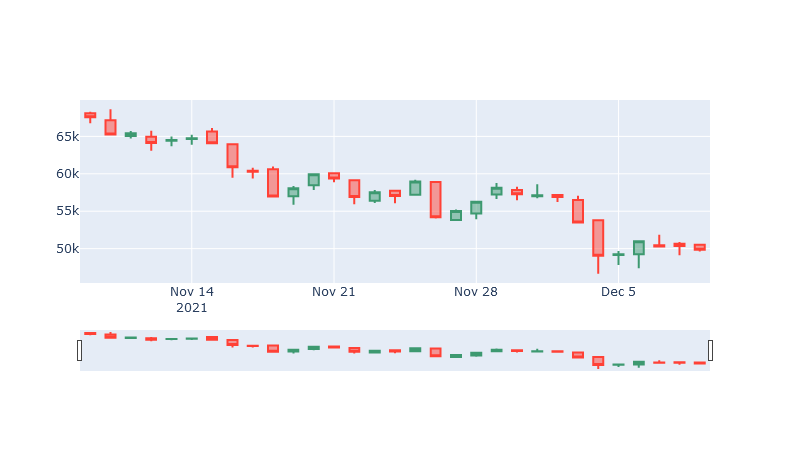

In [44]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
